In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
symptoms = [
    'fever',
    'cough',
    'headache',
    'sore_throat',
    'runny_nose',
    'fatigue',
    'nausea',
    'vomiting',
    'diarrhea',
    'muscle_pain',
    'shortness_of_breath',
    'chest_pain',
    'dizziness',
    'rash',
    'abdominal_pain'
]

In [4]:
# List of diseases and their associated symptoms
disease_symptom_mapping = {
    'Common Cold': ['cough', 'sore_throat', 'runny_nose', 'fever', 'headache'],
    'Flu': ['fever', 'cough', 'muscle_pain', 'fatigue', 'headache'],
    'Migraine': ['headache', 'nausea', 'vomiting', 'dizziness'],
    'Food Poisoning': ['nausea', 'vomiting', 'diarrhea', 'abdominal_pain'],
    'COVID-19': ['fever', 'cough', 'shortness_of_breath', 'fatigue', 'muscle_pain'],
    'Allergy': ['sore_throat', 'runny_nose', 'rash', 'fatigue'],
    'Asthma': ['shortness_of_breath', 'cough', 'chest_pain'],
    'Chickenpox': ['fever', 'rash', 'fatigue', 'headache'],
    'Gastroenteritis': ['nausea', 'vomiting', 'diarrhea', 'abdominal_pain', 'fever'],
    'Sinusitis': ['headache', 'runny_nose', 'fever', 'fatigue', 'cough']
}

For each disease, we generate a specified number of samples (samples_per_disease).

Each sample includes all
disease-specific symptoms plus a random number (0 to 2) of additional symptoms.


This simulates real-world scenarios where patients might have overlapping symptoms.

In [5]:
# Number of samples per disease
samples_per_disease = 200

data = []

In [6]:
for disease, sympt_list in disease_symptom_mapping.items():
    for _ in range(samples_per_disease):
        # Randomly select symptoms: include all disease-specific symptoms and add some random symptoms
        num_additional_symptoms = np.random.randint(0, 3)  # 0 to 2 additional symptoms
        additional_symptoms = list(np.random.choice(symptoms, size=num_additional_symptoms, replace=False))
        # Combine disease-specific symptoms with additional symptoms
        patient_symptoms = list(set(sympt_list + additional_symptoms))
        data.append({'symptoms': patient_symptoms, 'disease': disease})

In [7]:
df = pd.DataFrame(data)

# Display the first few rows
print("Sample of the Synthetic Dataset:")
print(df.head())

Sample of the Synthetic Dataset:
                                            symptoms      disease
0  [runny_nose, headache, sore_throat, cough, fever]  Common Cold
1  [runny_nose, headache, sore_throat, cough, fat...  Common Cold
2  [muscle_pain, runny_nose, headache, sore_throa...  Common Cold
3  [runny_nose, headache, sore_throat, cough, fever]  Common Cold
4  [dizziness, runny_nose, headache, sore_throat,...  Common Cold


One-Hot Encoding:

We use MultiLabelBinarizer to convert the list of symptoms into a binary matrix where each column represents a symptom.
This is essential for feeding the data into machine learning models.

In [8]:
# 3. Data Preprocessing
# -----------------------------

# Initialize MultiLabelBinarizer for one-hot encoding of symptoms
mlb = MultiLabelBinarizer(classes=symptoms)

# Fit and transform the symptoms
X = mlb.fit_transform(df['symptoms'])

# Convert to DataFrame for better readability
X = pd.DataFrame(X, columns=mlb.classes_)

# Target variable
y = df['disease']

print("\nFeatures after One-Hot Encoding:")
print(X.head())


Features after One-Hot Encoding:
   fever  cough  headache  sore_throat  runny_nose  fatigue  nausea  vomiting  \
0      1      1         1            1           1        0       0         0   
1      1      1         1            1           1        1       0         0   
2      1      1         1            1           1        0       0         1   
3      1      1         1            1           1        0       0         0   
4      1      1         1            1           1        0       0         0   

   diarrhea  muscle_pain  shortness_of_breath  chest_pain  dizziness  rash  \
0         0            0                    0           0          0     0   
1         0            0                    0           0          0     0   
2         0            1                    0           0          0     0   
3         0            0                    0           0          0     0   
4         0            0                    0           0          1     0   

   abdomin

In [9]:
# 4. Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")


Training Samples: 1600
Testing Samples: 400


We split the dataset into training and testing sets using an 80-20 split.
stratify=y ensures that the distribution of diseases remains consistent across both sets.

In [10]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

We initialize a RandomForestClassifier with 100 trees.

In [11]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 96.25%

Classification Report:
                 precision    recall  f1-score   support

        Allergy       1.00      1.00      1.00        40
         Asthma       1.00      1.00      1.00        40
       COVID-19       0.93      0.95      0.94        40
     Chickenpox       1.00      1.00      1.00        40
    Common Cold       1.00      0.95      0.97        40
            Flu       0.84      0.90      0.87        40
 Food Poisoning       1.00      0.93      0.96        40
Gastroenteritis       0.95      1.00      0.98        40
       Migraine       0.98      1.00      0.99        40
      Sinusitis       0.95      0.90      0.92        40

       accuracy                           0.96       400
      macro avg       0.96      0.96      0.96       400
   weighted avg       0.96      0.96      0.96       400



In [13]:
# Save the trained model
joblib.dump(clf, 'disease_classifier.joblib')
print("Trained disease classification model saved as 'disease_classifier.joblib'.")

# Save the MultiLabelBinarizer for symptom encoding
joblib.dump(mlb, 'symptom_binarizer.joblib')
print("Symptom binarizer saved as 'symptom_binarizer.joblib'.")

# Save the list of known symptoms for reference
joblib.dump(symptoms, 'known_symptoms.joblib')
print("List of known symptoms saved as 'known_symptoms.joblib'.")

Trained disease classification model saved as 'disease_classifier.joblib'.
Symptom binarizer saved as 'symptom_binarizer.joblib'.
List of known symptoms saved as 'known_symptoms.joblib'.


Save the trained model using joblib.

Save the MultiLabelBinarizer to ensure consistent symptom encoding during inference.

Save the list of known symptoms for reference in the inference app.

## Stock Prediction

In [14]:
!pip install yfinance

In [15]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [16]:
# Define the ticker symbol
ticker = 'MSFT'

# Fetch data from Yahoo Finance
msft_data = yf.download(ticker, start='2022-01-01', end='2024-11-07')

# Display the last few rows
print(msft_data.tail())

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Date                                                                        
2024-10-31 00:00:00+00:00  406.350006  406.350006  416.160004  406.299988   
2024-11-01 00:00:00+00:00  410.369995  410.369995  415.500000  407.500000   
2024-11-04 00:00:00+00:00  408.459991  408.459991  410.420013  405.570007   
2024-11-05 00:00:00+00:00  411.459991  411.459991  414.899994  408.079987   
2024-11-06 00:00:00+00:00  420.179993  420.179993  420.450012  410.519989   

Price                            Open    Volume  
Ticker                           MSFT      MSFT  
Date                                             
2024-10-31 00:00:00+00:00  415.359985  53971000  
2024-11-01 00:00:00+00:00  409.010010  24230400  
2024-11-04 00:00:00+00:00  409.799988  19672300  
2024-11-05 00:00:00+00:00  408.369995  17626000  
2024-11-06 00:00:00+00:00  412.42

In [17]:
# Use the 'Close' price
msft_data = msft_data[['Close']]

# Create a shifted column for the next day's price
msft_data['Target'] = msft_data['Close'].shift(-1)

# Drop the last row as it will have NaN in 'Target'
msft_data = msft_data[:-1]

# Features and target
X = msft_data[['Close']]
y = msft_data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

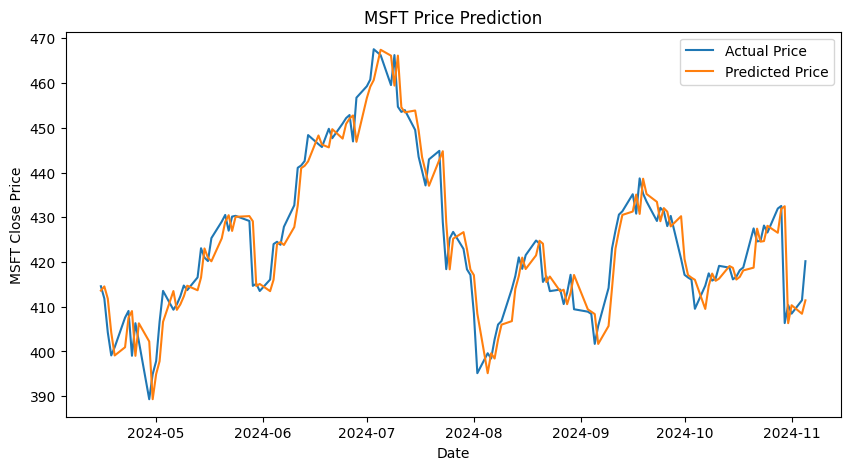

In [18]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('MSFT Close Price')
plt.title('MSFT Price Prediction')
plt.legend()
plt.show()

In [20]:
import numpy as np
import pandas as pd

# Get the last available close price
last_price = msft_data['Close'].iloc[-1]

predicted_prices = []
current_price = last_price

for _ in range(7):
    # Create a DataFrame with the same structure as the training data
    input_data = pd.DataFrame({'Close': [current_price]})

    # Predict the next price
    next_price = model.predict(input_data)[0]

    # Append the predicted price to the list
    predicted_prices.append(next_price)

    # Update the current_price for the next prediction
    current_price = next_price

# Create a date range for the next 7 business days
last_date = msft_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='B')  # 'B' for business days

# Create a DataFrame for the predictions
prediction_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': predicted_prices})
print(prediction_df)

                       Date  Predicted_Close
0 2024-11-06 00:00:00+00:00       411.428657
1 2024-11-07 00:00:00+00:00       411.397374
2 2024-11-08 00:00:00+00:00       411.366140
3 2024-11-11 00:00:00+00:00       411.334956
4 2024-11-12 00:00:00+00:00       411.303823
5 2024-11-13 00:00:00+00:00       411.272739
6 2024-11-14 00:00:00+00:00       411.241705


In [22]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import string
from datasets import load_dataset

# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Load the IMDb dataset
dataset = load_dataset('imdb')

# The dataset has 'train' and 'test' splits
print(f"Training samples: {len(dataset['train'])}")
print(f"Test samples: {len(dataset['test'])}")

# Convert to pandas DataFrame for easier manipulation
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# Display the first few rows
print(train_df.head())

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Training samples: 25000
Test samples: 25000
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


In [26]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to training and test data
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

# Display the cleaned reviews
print(train_df[['text', 'clean_text']].head())

                                                text  \
0  I rented I AM CURIOUS-YELLOW from my video sto...   
1  "I Am Curious: Yellow" is a risible and preten...   
2  If only to avoid making this type of film in t...   
3  This film was probably inspired by Godard's Ma...   
4  Oh, brother...after hearing about this ridicul...   

                                          clean_text  
0  rented curiousyellow video store controversy s...  
1  curious yellow risible pretentious steaming pi...  
2  avoid making type film future film interesting...  
3  film probably inspired godards masculin fémini...  
4  oh brotherafter hearing ridiculous film umptee...  


Convert the text data into numerical features that the machine learning model can understand. We'll use the Bag of Words approach with CountVectorizer.

In [27]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform both training and test data
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])

# Target variables
y_train = train_df['label']
y_test = test_df['label']

In [28]:
# Optionally, split the training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

In [29]:
# Initialize the classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Accuracy on test set: 82.71%
              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84     12500
    Positive       0.87      0.77      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [31]:
def predict_sentiment(review):
    # Preprocess the review
    clean = preprocess_text(review)
    # Vectorize
    vect = vectorizer.transform([clean])
    # Predict
    prediction = classifier.predict(vect)[0]
    return 'Positive' if prediction == 1 else 'Negative'

# Example
new_review = "I absolutely loved this movie! The acting was great and the story was compelling."
print(f'Review: "{new_review}"')
print(f'Sentiment: {predict_sentiment(new_review)}')


Review: "I absolutely loved this movie! The acting was great and the story was compelling."
Sentiment: Positive


## Task

Problem Statement: Activity Preference Prediction
Scenario:

Imagine you're organizing a community event with various activities such as Singing, Dancing, Painting, Cooking, etc. Each participant can enjoy multiple activities. Your goal is to:

Understand the activity preferences of participants.
Predict which activities a participant might like based on their existing preferences.
Build a user-friendly application that allows organizers to input a participant's current interests and receive activity recommendations.

In [ ]:
# activity_preference_prediction.py

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# -----------------------------
# 1. Define Activities and Participants
# -----------------------------

# List of possible activities
activities = [
    'singing',
    'dancing',
    'painting',
    'cooking',
    'photography',
    'gardening',
    'cycling',
    'hiking',
    'reading',
    'writing',
    'yoga',
    'swimming',
    'knitting',
    'gaming',
    'bird_watching'
]

# List of participants and their liked activities
# For simplicity, we'll define a mapping from participants to activities
# In a real-world scenario, this data would come from surveys or databases
participant_activity_mapping = {
    'Alice': ['singing', 'painting', 'yoga'],
    'Bob': ['cycling', 'hiking', 'gaming'],
    'Charlie': ['cooking', 'gardening', 'knitting'],
    'Diana': ['dancing', 'photography', 'swimming'],
    'Ethan': ['reading', 'writing', 'bird_watching'],
    'Fiona': ['yoga', 'swimming', 'cycling'],
    'George': ['gaming', 'hiking', 'reading'],
    'Hannah': ['singing', 'dancing', 'gardening'],
    'Ian': ['painting', 'knitting', 'photography'],
    'Jenny': ['cooking', 'yoga', 'bird_watching']
}

# -----------------------------
# 2. Create Synthetic Dataset
# -----------------------------

# Number of participants
num_participants = len(participant_activity_mapping)

# Generate synthetic data by expanding each participant's activities
# We'll create multiple samples per participant by adding noise (additional activities)
samples_per_participant = 100  # Number of samples per participant

data = []

for participant, liked_activities in participant_activity_mapping.items():
    for _ in range(samples_per_participant):
        # Randomly decide how many additional activities to add (0 to 2)
        num_additional_activities = np.random.randint(0, 3)
        # Select additional activities that are not already liked
        additional_activities = list(np.random.choice(
            list(set(activities) - set(liked_activities)),
            size=num_additional_activities,
            replace=False
        ))
        # Combine liked activities with additional activities
        participant_activities = list(set(liked_activities + additional_activities))
        data.append({'participant': participant, 'activities': participant_activities})

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print("Sample of the Synthetic Dataset:")
print(df.head())

# -----------------------------
# 3. Data Preprocessing
# -----------------------------

# Initialize MultiLabelBinarizer for one-hot encoding of activities
mlb = MultiLabelBinarizer(classes=activities)

# Fit and transform the activities
X = mlb.fit_transform(df['activities'])

# Convert to DataFrame for better readability
X = pd.DataFrame(X, columns=mlb.classes_)

# Target variable: participant names
y = df['participant']

print("\nFeatures after One-Hot Encoding:")
print(X.head())

# -----------------------------
# 4. Train-Test Split
# -----------------------------

# Split the data into training and testing sets
# Since participants are the target, we need to ensure that all participants are represented in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

# -----------------------------
# 5. Model Training
# -----------------------------

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# -----------------------------
# 6. Model Evaluation
# -----------------------------

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 7. Save the Model and Preprocessing Objects
# -----------------------------

# Save the trained model
joblib.dump(clf, 'activity_classifier.joblib')
print("Trained activity classification model saved as 'activity_classifier.joblib'.")

# Save the MultiLabelBinarizer for activity encoding
joblib.dump(mlb, 'activity_binarizer.joblib')
print("Activity binarizer saved as 'activity_binarizer.joblib'.")

# Save the list of known activities for reference
joblib.dump(activities, 'known_activities.joblib')
print("List of known activities saved as 'known_activities.joblib'.")